# 1. 랜덤 포레스트 (28 X 28)

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784')
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [ ]:
print(mnist.data.shape, mnist.target.shape)

(70000, 784) (70000,)


In [ ]:
print(type(mnist.data), type(mnist.target))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
mnist.target.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

In [ ]:
# 데이터 보기
mnist.data.loc[0].values

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
mnist.data.loc[0].values.reshape(28,28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [ ]:
mnist.target[0]

'5'

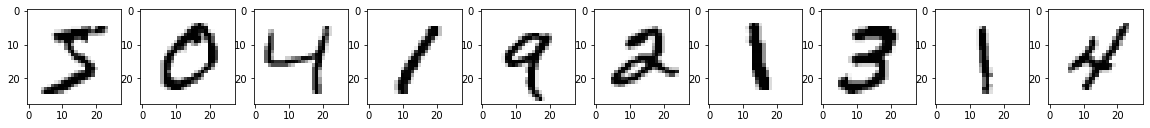

In [ ]:
import matplotlib.pyplot as plt

#plt.imshow(mnist.data.loc[0].values.reshape(28, 28), cmap='gray_r')
#plt.show()
fig, axs = plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):
  axs[i].imshow(mnist.data.loc[i].values.reshape(28, 28), cmap='gray_r')
  
plt.show()

In [ ]:
print([mnist.target[i] for i in range(10)])

['5', '0', '4', '1', '9', '2', '1', '3', '1', '4']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(56000, 784) (14000, 784)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score

pred = rf.predict(X_test)
accuracy_score(y_test, pred)

0.9655

# 2. 인공신경망 (입력층 - 출력층)

In [ ]:
from tensorflow import keras

In [ ]:
print(keras.__version__)

2.8.0


In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
print(type(train_images), type(train_labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_labels[0]

5

In [ ]:
import pandas as pd

pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [ ]:
import numpy as np

print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))


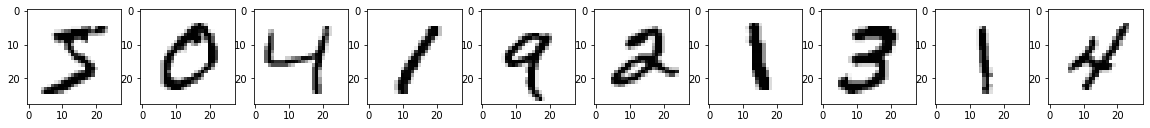

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):
  axs[i].imshow(train_images[i], cmap='gray_r')
  
plt.show()

In [ ]:
print([train_labels[i] for i in range(10)])

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [ ]:
# 이미지 데이터를 0과 1사이 값으로 정규화하고, reshape을 하여 일렬로 펼치기
train_scaled = train_images / 255.0
test_scaled = test_images / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
test_scaled = test_scaled.reshape(-1, 28*28)

In [ ]:
train_scaled.shape, test_scaled.shape

((60000, 784), (10000, 784))

In [ ]:
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape=(784,)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.layers[0].get_weights()

[array([[ 0.02477638, -0.08131756,  0.03289744, ...,  0.07477448,
         -0.01316041,  0.06317522],
        [ 0.0023082 , -0.05115639, -0.07209063, ...,  0.01470934,
         -0.08079602, -0.03050581],
        [ 0.0444132 , -0.05350098,  0.02546474, ..., -0.04321543,
         -0.01335758, -0.01623548],
        ...,
        [ 0.0500639 , -0.04784648, -0.07111156, ..., -0.05416685,
          0.0504282 ,  0.05091662],
        [ 0.05130396, -0.06264846, -0.03048359, ..., -0.05227186,
          0.01619318, -0.07188568],
        [-0.02013375,  0.0079465 , -0.01589204, ..., -0.04106632,
         -0.05007528, -0.06168104]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [ ]:
model.layers[0].get_weights()[0].shape

(784, 10)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.fit(train_scaled, train_labels, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.6534 - accuracy: 0.9098
Epoch 2/5
1/1 [==============================] - 0s 119ms/step - loss: 0.6494 - accuracy: 0.9101
Epoch 3/5
1/1 [==============================] - 0s 135ms/step - loss: 0.6467 - accuracy: 0.9104
Epoch 4/5
1/1 [==============================] - 0s 57ms/step - loss: 0.6444 - accuracy: 0.9105
Epoch 5/5
1/1 [==============================] - 0s 61ms/step - loss: 0.6425 - accuracy: 0.9108


In [ ]:
params = model.layers[0].get_weights()

In [ ]:
params[0].shape

(784, 10)

In [ ]:
params[1].shape

(10,)

In [ ]:
model.evaluate(test_scaled, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2857 - accuracy: 0.9248


[0.28571391105651855, 0.9247999787330627]

# 3. 인공신경망 (입력층 - 은닉층 - 출력층)

In [1]:
from tensorflow import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_scaled = train_images / 255.0
test_scaled = test_images / 255.0

In [4]:
#train_labels = keras.utils.to_categorical(train_labels, 10)
#test_labels = keras.utils.to_categorical(test_labels, 10)

In [5]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))   # sigmoid, 32->128->784
#model.add(layers.Dense(100, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.layers

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_scaled, train_labels, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 981ms/step - loss: 0.3487 - accuracy: 0.9548
Epoch 2/5
1/1 [==============================] - 0s 161ms/step - loss: 0.3051 - accuracy: 0.9601
Epoch 3/5
1/1 [==============================] - 0s 140ms/step - loss: 0.2852 - accuracy: 0.9619
Epoch 4/5
1/1 [==============================] - 0s 130ms/step - loss: 0.2705 - accuracy: 0.9629
Epoch 5/5
1/1 [==============================] - 0s 152ms/step - loss: 0.2585 - accuracy: 0.9639


In [ ]:
model.evaluate(test_scaled, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0867 - accuracy: 0.9777


[0.0866885855793953, 0.9776999950408936]

In [ ]:
history.history

{'accuracy': [0.9344333410263062,
  0.9701833128929138,
  0.9784166812896729,
  0.9830666780471802,
  0.9860000014305115],
 'loss': [0.22042639553546906,
  0.09863825142383575,
  0.07429062575101852,
  0.05982979014515877,
  0.04993325471878052]}